## Simple Autoencoder (Dimentionality reduction) - Mnist Dataset 

In [4]:
import tensorflow as tf
import numpy as np
import matplotlib

In [5]:
tf.__version__, np.__version__, matplotlib.__version__

('2.17.0', '1.26.4', '3.9.2')

In [6]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import Input, InputLayer, Dense
import matplotlib.pyplot as plt

In [7]:
(X_train, _), (X_test, _) = mnist.load_data()

In [8]:
X_train.shape, X_test.shape

((60000, 28, 28), (10000, 28, 28))

In [9]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [10]:
X_train = X_train.astype('float32')/255 #normalization

In [11]:
X_test = X_test.astype('float32')/255

In [12]:
X_train = X_train.reshape((len(X_train), np.prod(X_train.shape[1:])))
X_train.shape

(60000, 784)

In [13]:
X_test = X_test.reshape((len(X_test), np.prod(X_test.shape[1:])))
X_test.shape

(10000, 784)

In [14]:
# 784 pixels -> 32 pixels -> 784 pixels

autoencoder = Sequential()
autoencoder.add(InputLayer(shape=(784,)))
autoencoder.add(Dense(units=32, activation='relu'))
autoencoder.add(Dense(units=784, activation='sigmoid'))
autoencoder.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 32)             │        25,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 784)            │        25,872 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 50,992 (199.19 KB)

 Trainable params: 50,992 (199.19 KB)

 Non-trainable params: 0 (0.00 B)

In [15]:
autoencoder.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [16]:
# we want input to be close to output then we send X_train twice
autoencoder.fit(X_train, X_train, epochs=50, batch_size=256, validation_data=(X_test, X_test))

Epoch 1/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.0088 - loss: 0.3825 - val_accuracy: 0.0106 - val_loss: 0.1842
Epoch 2/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.0106 - loss: 0.1761 - val_accuracy: 0.0128 - val_loss: 0.1526
Epoch 3/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.0119 - loss: 0.1487 - val_accuracy: 0.0110 - val_loss: 0.1331
Epoch 4/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.0118 - loss: 0.1309 - val_accuracy: 0.0105 - val_loss: 0.1210
Epoch 5/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.0117 - loss: 0.1204 - val_accuracy: 0.0097 - val_loss: 0.1123
Epoch 6/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.0098 - loss: 0.1120 - val_accuracy: 0.0105 - val_loss: 0.1061
Epoch 7/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.0113 - loss: 0.1062 - val_accuracy: 0.0096 - val_loss: 0.1016
Epoch 8/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.0107 - loss: 0.1022 - val_accuracy: 0.

In [17]:
autoencoder.layers[0], autoencoder.layers[1]

(<Dense name=dense, built=True>, <Dense name=dense_1, built=True>)

In [18]:
or_dim = Input(shape=(784,))
enconder_layer = autoencoder.layers[0]
encoder = Model(or_dim, enconder_layer(or_dim))
encoder.summary()

Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)      │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 32)             │        25,120 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 25,120 (98.12 KB)

 Trainable params: 25,120 (98.12 KB)

 Non-trainable params: 0 (0.00 B)

In [19]:
encoded_imgs = encoder.predict(X_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 673us/step


In [20]:
encoded_imgs

array([[ 9.310353 ,  2.9100523,  6.806141 , ..., 11.967476 ,  4.2589927,
         3.0421214],
       [12.642114 ,  2.5315728, 15.353703 , ..., 14.742104 ,  8.641077 ,
         7.7210617],
       [ 1.7253089,  9.926176 ,  3.3211358, ...,  6.434269 ,  1.9662306,
         4.84509  ],
       ...,
       [ 8.204258 ,  8.362327 , 14.580918 , ...,  6.220275 ,  9.3777485,
         8.020173 ],
       [ 7.5497575,  4.883549 , 14.058133 , ..., 12.44154  ,  7.7355957,
         5.696884 ],
       [20.206217 ,  4.936576 , 18.323345 , ..., 10.828936 ,  9.511684 ,
        14.414631 ]], dtype=float32)

In [42]:
decoded_imgs = autoencoder.predict(X_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 746us/step


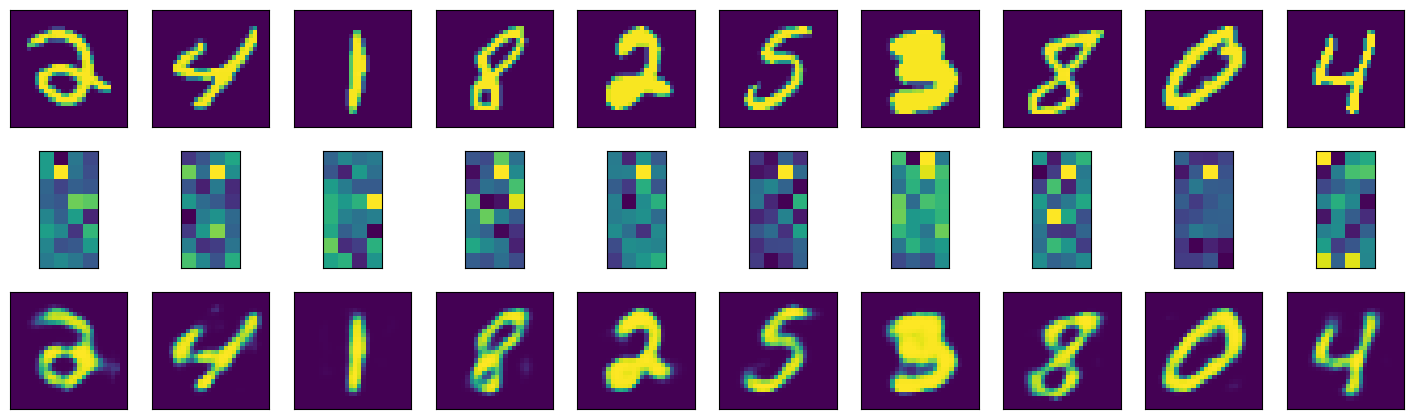

In [43]:
num_imgs = 10
test_imgs = np.random.randint(X_test.shape[0], size=num_imgs)
plt.figure(figsize=(18,18))
for i, index_img in enumerate(test_imgs):
    # print(i)
    # print(indice_img)

    # original images
    axis = plt.subplot(10, 10, i+1)
    plt.imshow(X_test[index_img].reshape(28, 28))
    plt.xticks(())
    plt.yticks(())

    # encoded images
    axis = plt.subplot(10, 10, i+1+num_imgs)
    plt.imshow(encoded_imgs[index_img].reshape(8, 4))
    plt.xticks(())
    plt.yticks(())

    # decoded images
    axis = plt.subplot(10, 10, i+1+num_imgs*2)
    plt.imshow(decoded_imgs[index_img].reshape(28, 28))
    plt.xticks(())
    plt.yticks(())